In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m
from matplotlib import pyplot as plt
import math

In [2]:
data= pd.read_csv('../sep19SexAndAgeAddedFINAL DATASET_ver2.txt',sep=',')
data=data.drop(columns=['B_DAY'])

In [3]:
# x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
# y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')


In [4]:
# data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
# # data=data.dropna(). reset_index()

In [5]:
# temp= data.L100800_y - data.L100800_x
# temp[temp>0].shape
# temp[temp<0].shape
# temp[temp==0].shape

In [6]:
data=data.query('FIELD_16 != 1 and FIELD_23 != 1')

# data=data[data.SEX==0]
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_22!=1]
# data=data[data.FIELD_24!=1]
# data=data[data.AGE<40]

In [7]:
# 'L103300', 'L103100', 'L100800', 'L101700', 'S000300', 'L100700', 'L102900', 'L190300', 'L101300', 
#          'L190500', 'S000501', 'S000502', 'L104600', 'L190000', 'L102000'
    
data2=data.copy()[['L103000', 'L103300', 'L103100', 'L100800', 'L101700', 'S000300', 'L100700', 'L102900', 'L190300', 'L101300', 
         'L190500', 'S000501', 'S000502', 'L104600', 'L190000', 'L102000',
           'FIELD_33', 'FIELD_15', 'FIELD_17', 'FIELD_7', 'FIELD_22', 'FIELD_38', 'FIELD_24', 'FIELD_6', 'FIELD_40', 
            'FIELD_41']].dropna()

x=data2[[ 'L103300', 'L103300', 'L103100', 'L100800', 'L101700', 'S000300', 'L100700', 'L102900', 'L190300', 'L101300', 
         'L190500', 'S000501', 'S000502', 'L104600', 'L190000', 'L102000',
           'FIELD_33', 'FIELD_15', 'FIELD_17', 'FIELD_7', 'FIELD_22', 'FIELD_38', 'FIELD_24', 'FIELD_6', 'FIELD_40', 
            'FIELD_41']]  

y=data2[['L103000']]

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, random_state=42, test_size=0.2)

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xtrain, ytrain)
reg.score(xtest, ytest)

0.38687810328438743

mean_squared_error 1956.9394720525468
root mean_squared_error 44.237308598653996
mean_absolute_error 27.339297248356118
r2_score 0.38687810328438743


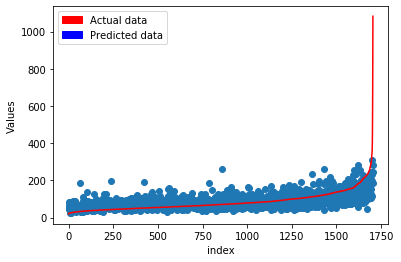

,t + 1,pred (t +1)
1261,299.0,154.651532
824,310.0,244.361201
1193,314.0,115.209453
854,339.0,195.640450
532,344.0,310.875194
138,362.0,233.181964
76,413.0,232.456989
1295,531.0,187.072641
1454,727.0,246.643457
1294,1082.0,281.713555


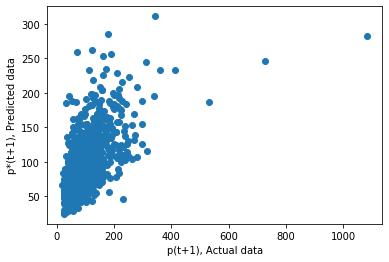

In [10]:
from sklearn import metrics as m 
ypred=reg.predict(xtest)
print('mean_squared_error',m.mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(m.mean_squared_error(ytest, ypred)))
print('mean_absolute_error',m.mean_absolute_error(ytest, ypred))
print('r2_score',m.r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel() # ytest.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [11]:
import xgboost as xgb

In [12]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',max_depth = 10, alpha = 200, n_estimators = 50, 
                          booster='gbtree',
                          colsample_bytree = 0.6,learning_rate = 0.08,gamma=10, tree_method = 'gpu_hist'
                         )


# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
#                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)


xg_reg.fit(xtrain, ytrain) 

ValueError: feature_names must be unique

In [ ]:
from sklearn import metrics as m 
ypred=xg_reg.predict(xtest)


ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel() # ytest.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

ypredPD=ypredPD.dropna()

print('mean_squared_error',m.mean_squared_error(ypredPD['t + 1'], ypredPD['pred (t +1)']))
print('root mean_squared_error',math.sqrt(m.mean_squared_error(ypredPD['t + 1'], ypredPD['pred (t +1)'])))
print('mean_absolute_error',m.mean_absolute_error(ypredPD['t + 1'], ypredPD['pred (t +1)']))
print('r2_score',m.r2_score(ypredPD['t + 1'], ypredPD['pred (t +1)']))

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)